In [1]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes abd longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
cities = []
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e422f1b46ff65ddd19a2a1fe9686417c


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | chegutu
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | ambilobe
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | oktyabrskiy
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | marsh harbour
Processing Record 13 of Set 1 | sayyan
Processing Record 14 of Set 1 | roseburg
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | yumen
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | kyra
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | kodiak
Processing Record 23 of Set 1 | raudeberg
P

Processing Record 37 of Set 4 | maniitsoq
Processing Record 38 of Set 4 | iracoubo
Processing Record 39 of Set 4 | shiyan
Processing Record 40 of Set 4 | sataua
City not found. Skipping...
Processing Record 41 of Set 4 | stornoway
Processing Record 42 of Set 4 | do rud
City not found. Skipping...
Processing Record 43 of Set 4 | karachi
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | awbari
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | cap malheureux
Processing Record 48 of Set 4 | raufoss
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | bandarbeyla
Processing Record 1 of Set 5 | southbridge
Processing Record 2 of Set 5 | alta floresta
Processing Record 3 of Set 5 | karkaralinsk
City not found. Skipping...
Processing Record 4 of Set 5 | margate
Processing Record 5 of Set 5 | basco
Processing Record 6 of Set 5 | wuhu
Processing Record 7 of Set 5 | semirom
Processing Reco

Processing Record 23 of Set 8 | along
Processing Record 24 of Set 8 | candelaria
Processing Record 25 of Set 8 | galesong
Processing Record 26 of Set 8 | gautier
Processing Record 27 of Set 8 | gurskoye
City not found. Skipping...
Processing Record 28 of Set 8 | loviisa
Processing Record 29 of Set 8 | druzhba
Processing Record 30 of Set 8 | schattdorf
Processing Record 31 of Set 8 | port hedland
Processing Record 32 of Set 8 | viligili
City not found. Skipping...
Processing Record 33 of Set 8 | zyryanka
Processing Record 34 of Set 8 | trabzon
Processing Record 35 of Set 8 | nichinan
Processing Record 36 of Set 8 | sorland
Processing Record 37 of Set 8 | am timan
Processing Record 38 of Set 8 | ostrovnoy
Processing Record 39 of Set 8 | castlegar
Processing Record 40 of Set 8 | kingaroy
Processing Record 41 of Set 8 | ust-kut
Processing Record 42 of Set 8 | shasta lake
Processing Record 43 of Set 8 | pangai
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | mantua

Processing Record 12 of Set 12 | price
Processing Record 13 of Set 12 | nchelenge
Processing Record 14 of Set 12 | chara
Processing Record 15 of Set 12 | robertsport
Processing Record 16 of Set 12 | great falls
Processing Record 17 of Set 12 | arcata
Processing Record 18 of Set 12 | fallon
Processing Record 19 of Set 12 | xunchang
Processing Record 20 of Set 12 | tooele
Processing Record 21 of Set 12 | evensk
Processing Record 22 of Set 12 | nicoya
Processing Record 23 of Set 12 | saint-joseph
Processing Record 24 of Set 12 | choya
Processing Record 25 of Set 12 | miraflores
Processing Record 26 of Set 12 | rayong
Processing Record 27 of Set 12 | etchoropo
Processing Record 28 of Set 12 | broken hill
Processing Record 29 of Set 12 | malibu
Processing Record 30 of Set 12 | sargatskoye
Processing Record 31 of Set 12 | dwarka
Processing Record 32 of Set 12 | lavrentiya
Processing Record 33 of Set 12 | kabanga
Processing Record 34 of Set 12 | amuntai
Processing Record 35 of Set 12 | port m

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-0.38,78,90,5.75,US,2021-11-23 18:01:26
1,Bethel,41.3712,-73.4140,42.48,50,7,3.00,US,2021-11-23 18:01:26
2,Tasiilaq,65.6145,-37.6368,23.16,62,64,8.12,GL,2021-11-23 18:01:27
3,Chegutu,-18.1302,30.1407,70.25,81,87,6.49,ZW,2021-11-23 18:01:27
4,Klaksvik,62.2266,-6.5890,47.32,86,98,25.46,FO,2021-11-23 18:01:28
5,Atuona,-9.8000,-139.0333,77.47,79,71,15.05,PF,2021-11-23 18:01:28
6,Ambilobe,-13.2000,49.0500,76.48,81,64,3.40,MG,2021-11-23 18:01:28
7,Nanortalik,60.1432,-45.2371,29.50,50,84,6.24,GL,2021-11-23 18:01:29
8,Oktyabrskiy,54.4815,53.4710,6.46,97,71,6.44,RU,2021-11-23 18:01:29
9,Busselton,-33.6500,115.3333,53.10,82,0,9.51,AU,2021-11-23 18:01:29


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speeds = city_data_df["Wind Speed"]

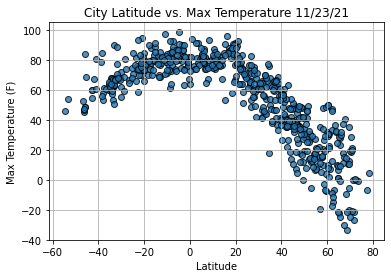

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

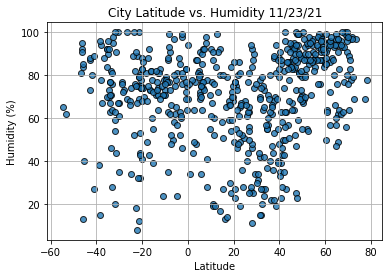

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

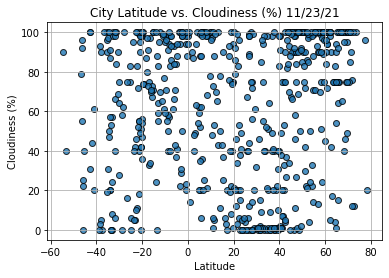

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

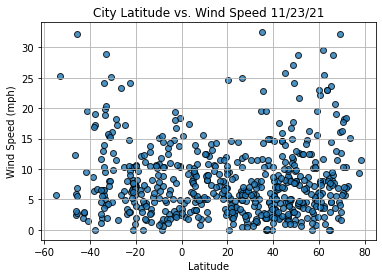

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speeds,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-0.38,78,90,5.75,US,2021-11-23 18:01:26
1,Bethel,41.3712,-73.4140,42.48,50,7,3.00,US,2021-11-23 18:01:26
2,Tasiilaq,65.6145,-37.6368,23.16,62,64,8.12,GL,2021-11-23 18:01:27
4,Klaksvik,62.2266,-6.5890,47.32,86,98,25.46,FO,2021-11-23 18:01:28
7,Nanortalik,60.1432,-45.2371,29.50,50,84,6.24,GL,2021-11-23 18:01:29
...,...,...,...,...,...,...,...,...,...
580,Vanavara,60.3400,102.2797,8.22,99,96,3.69,RU,2021-11-23 18:16:50
581,Juneau,58.3019,-134.4197,34.21,96,90,10.36,US,2021-11-23 18:16:50
582,Bardejov,49.2918,21.2727,42.21,73,91,2.95,SK,2021-11-23 18:16:51
583,Havoysund,70.9963,24.6622,20.28,87,100,6.98,NO,2021-11-23 18:16:51


In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-0.38,78,90,5.75,US,2021-11-23 18:01:26
1,Bethel,41.3712,-73.4140,42.48,50,7,3.00,US,2021-11-23 18:01:26
2,Tasiilaq,65.6145,-37.6368,23.16,62,64,8.12,GL,2021-11-23 18:01:27
4,Klaksvik,62.2266,-6.5890,47.32,86,98,25.46,FO,2021-11-23 18:01:28
7,Nanortalik,60.1432,-45.2371,29.50,50,84,6.24,GL,2021-11-23 18:01:29


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

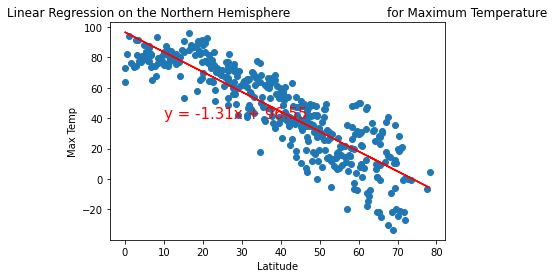

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

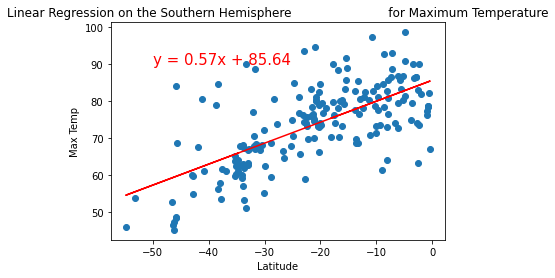

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

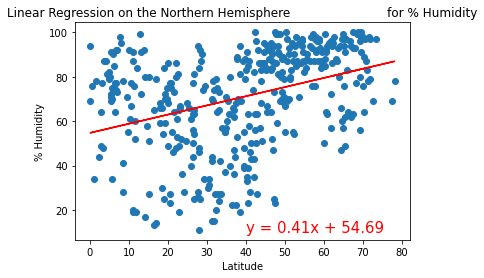

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

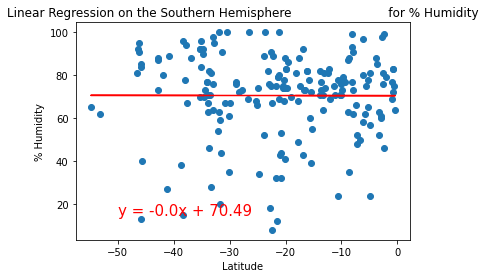

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

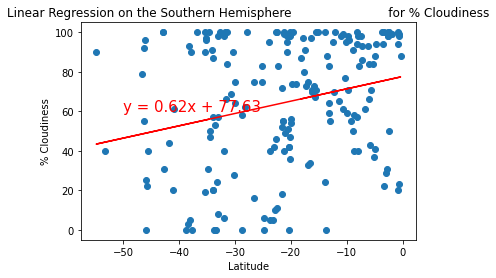

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

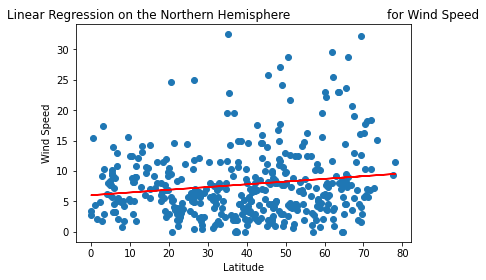

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))